# Medidas de Tendencia Central

### Media

La media es la suma de todos los elementos $x_i$ de un conjunto $X$, divididos entre el número total de elementos $n$.
$$\\\sum_i^n x_i / n$$

In [88]:
#Función de la media
def media(data):
    return float(sum(data)) / float(len(data))

### Mediana

Es el número intermedio de un grupo de números, es decir, la mitad de los números son superiores a la mediana y la mitad de los números tienen valores menores que la mediana.

In [1]:
#Función de la mediana
def mediana(data):
    ordenados = sorted(data)
    medio = len(ordenados) // 2
    #Si el número de datos es impar, devolvemos el valor de en medio
    if len(data) % 2 != 0:
        return ordenados[medio]
    #Entonces el número de datos es par, devolvemos el promedio
    return (ordenados[medio - 1] + ordenados[medio]) / 2

### Moda

Es el valor que tiene mayor frecuencia absoluta.

In [23]:
#Función de la moda
def moda(data):
    diccionario = []
    max = 0
    temp = 0
    for value in range(0, len(data)):
        temp = data.count(data[value])
        if(temp == max and data[value] not in diccionario):
            diccionario.append(data[value])
        if(temp > max):
            max = temp
            diccionario = []
            diccionario.append(data[value])

    return diccionario

# Medidas de dispersión

### Varianza

Representa la variabilidad de una serie de datos con respecto a su media.

In [102]:
#Función de varianza
#muestral: true para cálculo muestral, false para cálculo poblacional 
def varianza(data, muestral):
    xbarra = media(data)
    numeradores = data.copy()

    for i in range(0, len(numeradores)):
        numeradores[i] = pow(numeradores[i] - xbarra, 2)

    if(muestral):
        return float(sum(numeradores)) / float((len(numeradores) - 1))
    else:
        return float(sum(numeradores)) / float(len(numeradores))

### Desviación estándar

Indica qué ta dispersos están los datos con respecto a la media y con la misma unidad de medida que los datos.

In [76]:
#Función para la desviación estándar
#muestral: true para cálculo muestral, false para cálculo poblacional 
def desv_standar(data, muestral):
    return pow(varianza(data, muestral), 0.5)

### Sesgo

Indica la diferencia entre el valor del estimador esperado y el estimador real.

In [115]:
#Función Sesgo de la Media
#muestral: true para cálculo muestral, false para cálculo poblacional 
def media_sesgo(data, muestral):    
    numeradores = data.copy()
    xbarra = media(numeradores)

    for i in range(0, len(data)):
        numeradores[i] = pow(numeradores[i] - xbarra, 3) * len(numeradores)

    return sum(numeradores) / ((len(numeradores) - 1) * (len(data) - 2) * pow(desv_standar(numeradores, muestral), 3))

### Cuantiles

Son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria. Normalmente se suelen dividir en 4 (cuartiles), 100 (percentiles)

In [110]:
#Función de cuantiles: 
#q es el cuantil por el que quieres partir (4, 10, 100 ,..., n)
#ntil es el cuantil que quieres visualizar, si pones 0, regresa todos los cuantiles
def cuantiles(data, q, ntil):
    ordenados = data.copy()
    ordenados = sorted(ordenados)
    cuantiles = {}

    if(q < ntil):
        return 'Error: la q debe ser igual o mayor al ntil que ocupas'

    for i in range(1, q + 1):
        rango = (float(i) / float(q)) * (len(data) - 1)
        rango_int = int(rango)
        rango_dec = rango % 1

        if rango_dec:
            cuantiles[i] = ordenados[rango_int] + rango_dec * (ordenados[rango_int + 1] - ordenados[rango_int])
        else:
            cuantiles[i] = ordenados[rango_int]

    if ntil == 0:
        return cuantiles
    else:
        return cuantiles[ntil]


### Ejemplos

A continuación, se pondrá una temperatura cualquiera de datos y se mostrará el funcionamiento de las funciones previamente realizadas.

In [118]:
lista = [2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1]

print("Media: " + str(media(lista)))
print("Mediana: " + str(mediana(lista)))
print("Moda: " + str(moda(lista)))
print("Varianza Muestral: " + str(varianza(lista, True)))
print("Varianza Poblacional: " + str(varianza(lista, False)))
print("Desviación estándar Muestral: " + str(desv_standar(lista, True)))
print("Desviación estándar Poblacional: " + str(desv_standar(lista, False)))
print("Sesgo con respecto a la media muestral: " + str(media_sesgo(lista, True)))
print("Sesgo con respecto a la media poblacional: " + str(media_sesgo(lista, False)))
print("Cuartiles: " + str(cuantiles(lista, 4, 0)))


Media: 8.428571428571429
Mediana: 9.0
Moda: [2]
Varianza Muestral: 57.73544973544972
Varianza Poblacional: 55.673469387755084
Desviación estándar Muestral: 7.598384679354535
Desviación estándar Poblacional: 7.461465632686053
Sesgo con respecto a la media muestral: 7.419526283702451e-12
Sesgo con respecto a la media poblacional: 7.835515578945387e-12
Cuartiles: {1: 2.0, 2: 9.0, 3: 11.0, 4: 24}


In [168]:
def Analisis_Descriptivo(lista):
    print("Media: " + str(media(lista)))
    print("Mediana: " + str(mediana(lista)))
    print("Moda: " + str(moda(lista)))
    print("Varianza Muestral: " + str(varianza(lista, True)))
    print("Varianza Poblacional: " + str(varianza(lista, False)))
    print("Desviación estándar Muestral: " + str(desv_standar(lista, True)))
    print("Desviación estándar Poblacional: " + str(desv_standar(lista, False)))
    print("Sesgo con respecto a la media muestral: " + str(media_sesgo(lista, True)))
    print("Sesgo con respecto a la media poblacional: " + str(media_sesgo(lista, False)))
    print("Cuartiles: " + str(cuantiles(lista, 4, 0)))

# Estadísticos descriptivos de la generación de energía en un Panel Solar en la hora 17

Ahora, utilizando la información limpia generada en la Tarea 02, procederemos a realizar un análisis descriptivo de la generación de energía. Siendo que cada hora del día se puede comportar de manera diferente, y para facilitar el ejercicio, nos reduciremos a analizar la hora 17, ya que es una hora que se puede comportar de manera muy diferente en cada momento del año y con una condición muy variada.

In [119]:
import pandas as pd

In [125]:
#Leemos los datos limpios
generacionCompleta = pd.read_excel('../Datasets/Informacion Planta Solar Limpio.xlsx')

In [150]:
#Seleccionamos los datos solo que sean de la hora 17
generacion17 = generacionCompleta.loc[generacionCompleta['NumHora'] == 17]
generacion17.head()

,Fecha,Verano,Bit Horario,Periodo,Generación kW,Dia,Ciudad,NumHora,Temperatura,ProbabilidadLluvia,HumedadRelativa,VelocidadViento,DireccionViento,CondicionCielo,DescDireccionViento,VelocidadRafaga,Precipitacion,Real
108,2020-05-19 16:00:00,0,I,Del primer domingo de abril al sábado anterior...,7834.114715,2020-05-19,Villa de Arista,17,34.62,0.0,17.45,6.79,254.53,Despejado,Oeste,10.61,0.0,0
109,2020-05-19 16:05:00,0,I,Del primer domingo de abril al sábado anterior...,4895.917461,2020-05-19,Villa de Arista,17,34.62,0.0,17.45,6.79,254.53,Despejado,Oeste,10.61,0.0,0
110,2020-05-19 16:10:00,0,I,Del primer domingo de abril al sábado anterior...,6189.711414,2020-05-19,Villa de Arista,17,34.62,0.0,17.45,6.79,254.53,Despejado,Oeste,10.61,0.0,0
111,2020-05-19 16:15:00,0,I,Del primer domingo de abril al sábado anterior...,5197.006302,2020-05-19,Villa de Arista,17,34.62,0.0,17.45,6.79,254.53,Despejado,Oeste,10.61,0.0,0
112,2020-05-19 16:20:00,0,I,Del primer domingo de abril al sábado anterior...,5686.225793,2020-05-19,Villa de Arista,17,34.62,0.0,17.45,6.79,254.53,Despejado,Oeste,10.61,0.0,0


In [151]:
generacion17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14088 entries, 108 to 331283
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                14088 non-null  datetime64[ns]
 1   Verano               14088 non-null  int64         
 2   Bit Horario          14088 non-null  object        
 3   Periodo              14088 non-null  object        
 4   Generación kW        14088 non-null  float64       
 5   Dia                  14088 non-null  datetime64[ns]
 6   Ciudad               14088 non-null  object        
 7   NumHora              14088 non-null  int64         
 8   Temperatura          14088 non-null  float64       
 9   ProbabilidadLluvia   14088 non-null  float64       
 10  HumedadRelativa      14088 non-null  float64       
 11  VelocidadViento      14088 non-null  float64       
 12  DireccionViento      14088 non-null  float64       
 13  CondicionCielo       14088 non-nu

In [156]:
#Seleccionamos las columnas que nos interesan analizar
selected = generacion17[["Generación kW", "Temperatura", "ProbabilidadLluvia", "HumedadRelativa", "VelocidadViento", "DireccionViento", "CondicionCielo", "DescDireccionViento", "VelocidadRafaga", "Precipitacion"]]
generacion17ColFiltradas = selected.copy()

In [159]:
#Ahora, convertiremos las variables descriptivas en números
generacion17ColFiltradas.CondicionCielo.unique()
generacion17ColFiltradas.loc[generacion17ColFiltradas["CondicionCielo"] == "Despejado", "CondicionCielo"] = 1
generacion17ColFiltradas.loc[generacion17ColFiltradas["CondicionCielo"] == "Poco nuboso", "CondicionCielo"] = 2
generacion17ColFiltradas.loc[generacion17ColFiltradas["CondicionCielo"] == "Medio nublado", "CondicionCielo"] = 3
generacion17ColFiltradas.loc[generacion17ColFiltradas["CondicionCielo"] == "Cielo nublado", "CondicionCielo"] = 4
generacion17ColFiltradas.loc[generacion17ColFiltradas["CondicionCielo"] == "Cielo cubierto", "CondicionCielo"] = 5

In [162]:
generacion17ColFiltradas.DescDireccionViento.unique()
generacion17ColFiltradas.loc[generacion17ColFiltradas["DescDireccionViento"] == "Norte", "DescDireccionViento"] = 1
generacion17ColFiltradas.loc[generacion17ColFiltradas["DescDireccionViento"] == "Noreste", "DescDireccionViento"] = 2
generacion17ColFiltradas.loc[generacion17ColFiltradas["DescDireccionViento"] == "Este", "DescDireccionViento"] = 3
generacion17ColFiltradas.loc[generacion17ColFiltradas["DescDireccionViento"] == "Sureste", "DescDireccionViento"] = 4
generacion17ColFiltradas.loc[generacion17ColFiltradas["DescDireccionViento"] == "Sur", "DescDireccionViento"] = 5
generacion17ColFiltradas.loc[generacion17ColFiltradas["DescDireccionViento"] == "Suroeste", "DescDireccionViento"] = 6
generacion17ColFiltradas.loc[generacion17ColFiltradas["DescDireccionViento"] == "Oeste", "DescDireccionViento"] = 7
generacion17ColFiltradas.loc[generacion17ColFiltradas["DescDireccionViento"] == "Noroeste", "DescDireccionViento"] = 8

In [164]:
generacion17ColFiltradas[['CondicionCielo', 'DescDireccionViento']] = generacion17ColFiltradas[['CondicionCielo', 'DescDireccionViento']].apply(pd.to_numeric)
generacion17ColFiltradas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14088 entries, 108 to 331283
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Generación kW        14088 non-null  float64
 1   Temperatura          14088 non-null  float64
 2   ProbabilidadLluvia   14088 non-null  float64
 3   HumedadRelativa      14088 non-null  float64
 4   VelocidadViento      14088 non-null  float64
 5   DireccionViento      14088 non-null  float64
 6   CondicionCielo       14088 non-null  int64  
 7   DescDireccionViento  14088 non-null  int64  
 8   VelocidadRafaga      14088 non-null  float64
 9   Precipitacion        14088 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.2 MB


In [165]:
#Matriz de correlación
generacion17ColFiltradas.corr()

,Generación kW,Temperatura,ProbabilidadLluvia,HumedadRelativa,VelocidadViento,DireccionViento,CondicionCielo,DescDireccionViento,VelocidadRafaga,Precipitacion
Generación kW,1.000000,0.183657,-0.167460,-0.124480,0.091691,-0.082036,-0.233004,-0.082064,0.068879,-0.097175
Temperatura,0.183657,1.000000,-0.119894,-0.509070,0.049452,0.189517,-0.120410,0.155892,0.029626,-0.019865
ProbabilidadLluvia,-0.167460,-0.119894,1.000000,0.117723,-0.037368,-0.102879,0.371850,-0.110991,-0.063043,0.407674
HumedadRelativa,-0.124480,-0.509070,0.117723,1.000000,-0.036414,-0.416778,0.129441,-0.222627,0.055738,-0.094698
VelocidadViento,0.091691,0.049452,-0.037368,-0.036414,1.000000,0.183712,-0.089584,0.015179,0.738615,0.001482
DireccionViento,-0.082036,0.189517,-0.102879,-0.416778,0.183712,1.000000,-0.130684,0.462924,-0.092300,0.050582
CondicionCielo,-0.233004,-0.120410,0.371850,0.129441,-0.089584,-0.130684,1.000000,-0.055930,-0.060932,0.083717
DescDireccionViento,-0.082064,0.155892,-0.110991,-0.222627,0.015179,0.462924,-0.055930,1.000000,0.144569,-0.058466
VelocidadRafaga,0.068879,0.029626,-0.063043,0.055738,0.738615,-0.092300,-0.060932,0.144569,1.000000,-0.038993
Precipitacion,-0.097175,-0.019865,0.407674,-0.094698,0.001482,0.050582,0.083717,-0.058466,-0.038993,1.000000


In [131]:
import matplotlib.pyplot as plt

### Temperatura

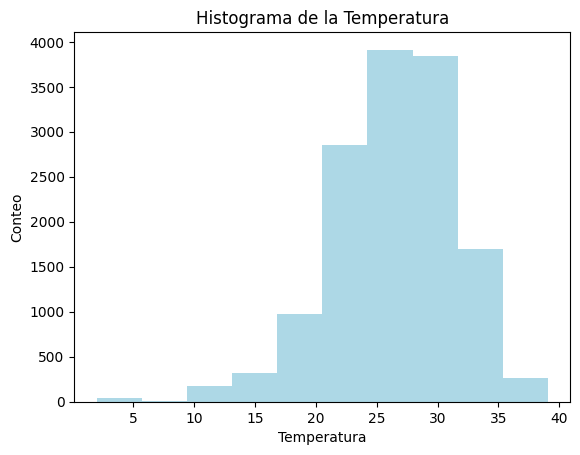

In [167]:
plt.figure(figsize=(6.4, 4.8))
plt.hist(generacion17ColFiltradas["Temperatura"].values, color="lightblue")
plt.title("Histograma de la Temperatura")
plt.xlabel("Temperatura")
plt.ylabel("Conteo")
plt.show()

In [173]:
temperatura = generacion17ColFiltradas["Temperatura"].tolist()
Analisis_Descriptivo(temperatura)

Media: 26.40337308347521
Mediana: 26.95
Moda: [27.0]
Varianza Muestral: 24.815809222053502
Varianza Poblacional: 24.81404773644717
Desviación estándar Muestral: 4.981546870406169
Desviación estándar Poblacional: 4.981370066201383
Sesgo con respecto a la media muestral: -4.274452210338764e-20
Sesgo con respecto a la media poblacional: -4.274907367015227e-20
Cuartiles: {1: 23.5, 2: 26.95, 3: 30.0, 4: 39.06}


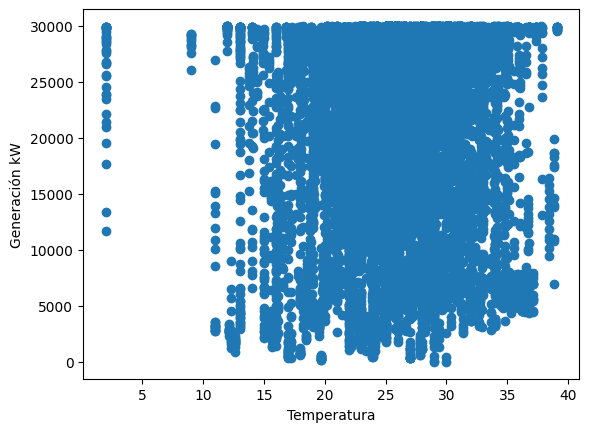

In [175]:
#Gráfica de dispersión Generación vs Temperatura
fig, ax = plt.subplots()
ax.scatter(x = generacion17ColFiltradas["Temperatura"].tolist(), y = generacion17ColFiltradas["Generación kW"].tolist())
plt.xlabel("Temperatura")
plt.ylabel("Generación kW")
plt.show()

### Probabilidad de lluvia

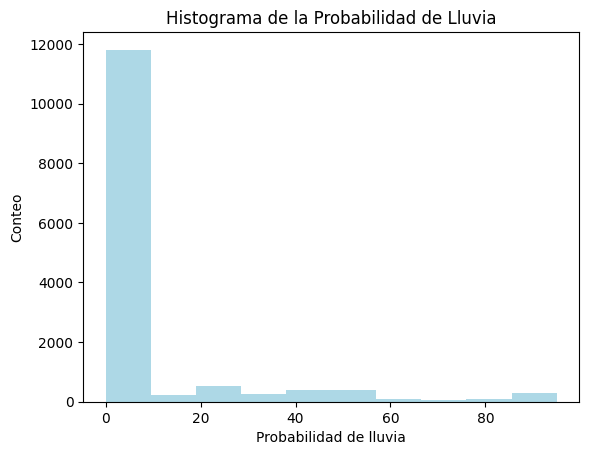

In [177]:
plt.figure(figsize=(6.4, 4.8))
plt.hist(generacion17ColFiltradas["ProbabilidadLluvia"].values, color="lightblue")
plt.title("Histograma de la Probabilidad de Lluvia")
plt.xlabel("Probabilidad de lluvia")
plt.ylabel("Conteo")
plt.show()

In [178]:
columna = generacion17ColFiltradas["ProbabilidadLluvia"].tolist()
Analisis_Descriptivo(columna)

Media: 7.646720613287904
Mediana: 0.0
Moda: [0.0]
Varianza Muestral: 369.21384812183413
Varianza Poblacional: 369.1876404381231
Desviación estándar Muestral: 19.214938150351514
Desviación estándar Poblacional: 19.214256177071313
Sesgo con respecto a la media muestral: 8.60820877196e-24
Sesgo con respecto a la media poblacional: 8.609125400220685e-24
Cuartiles: {1: 0.0, 2: 0.0, 3: 0.0, 4: 95.0}


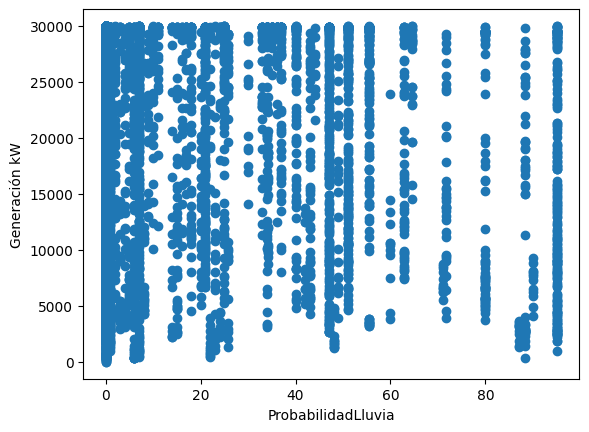

In [179]:
#Gráfica de dispersión Generación vs Probabilidad de lluvia
fig, ax = plt.subplots()
ax.scatter(x = generacion17ColFiltradas["ProbabilidadLluvia"].tolist(), y = generacion17ColFiltradas["Generación kW"].tolist())
plt.xlabel("ProbabilidadLluvia")
plt.ylabel("Generación kW")
plt.show()

### Humedad Relativa

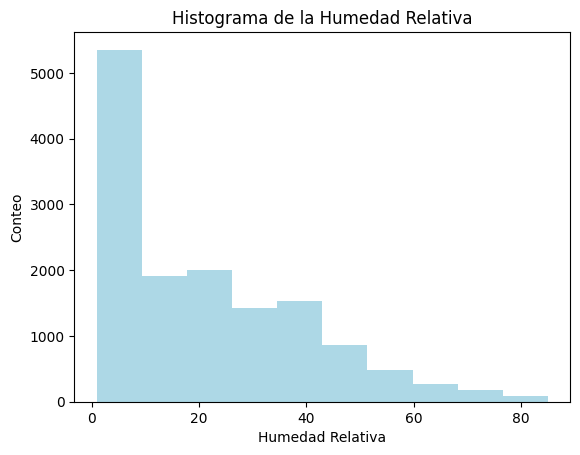

In [180]:
plt.figure(figsize=(6.4, 4.8))
plt.hist(generacion17ColFiltradas["HumedadRelativa"].values, color="lightblue")
plt.title("Histograma de la Humedad Relativa")
plt.xlabel("Humedad Relativa")
plt.ylabel("Conteo")
plt.show()

In [181]:
columna = generacion17ColFiltradas["HumedadRelativa"].tolist()
Analisis_Descriptivo(columna)

Media: 21.710528109028953
Mediana: 17.0
Moda: [6.0]
Varianza Muestral: 307.2129897402545
Varianza Poblacional: 307.19118302604807
Desviación estándar Muestral: 17.527492397381163
Desviación estándar Poblacional: 17.526870314635413
Sesgo con respecto a la media muestral: 1.2699489467487115e-22
Sesgo con respecto a la media poblacional: 1.2700841747764058e-22
Cuartiles: {1: 6.0, 2: 17.0, 3: 34.0, 4: 85.0}


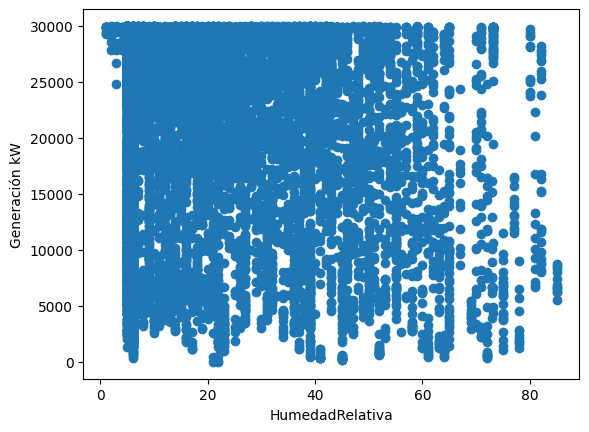

In [182]:
#Gráfica de dispersión Generación vs Humedad Relativa
fig, ax = plt.subplots()
ax.scatter(x = generacion17ColFiltradas["HumedadRelativa"].tolist(), y = generacion17ColFiltradas["Generación kW"].tolist())
plt.xlabel("HumedadRelativa")
plt.ylabel("Generación kW")
plt.show()

### Velocidad del Viento

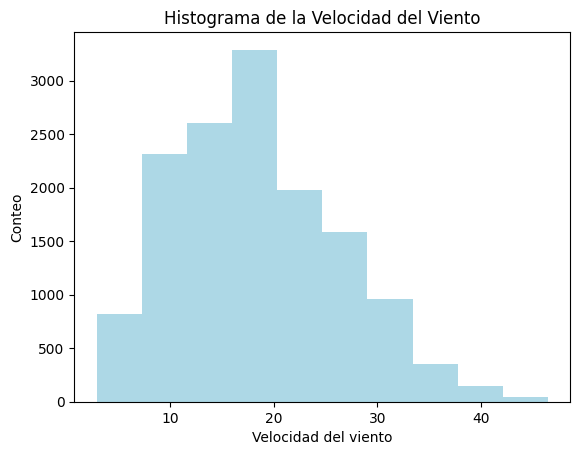

In [183]:
plt.figure(figsize=(6.4, 4.8))
plt.hist(generacion17ColFiltradas["VelocidadViento"].values, color="lightblue")
plt.title("Histograma de la Velocidad del Viento")
plt.xlabel("Velocidad del viento")
plt.ylabel("Conteo")
plt.show()

In [184]:
columna = generacion17ColFiltradas["VelocidadViento"].tolist()
Analisis_Descriptivo(columna)

Media: 18.54154173764903
Mediana: 17.895
Moda: [13.0]
Varianza Muestral: 60.831384660573065
Varianza Poblacional: 60.82706670311561
Desviación estándar Muestral: 7.799447715099644
Desviación estándar Poblacional: 7.799170898442706
Sesgo con respecto a la media muestral: 1.4168168628497903e-20
Sesgo con respecto a la media poblacional: 1.4169677298200397e-20
Cuartiles: {1: 13.0, 2: 17.895, 3: 23.74, 4: 46.5}


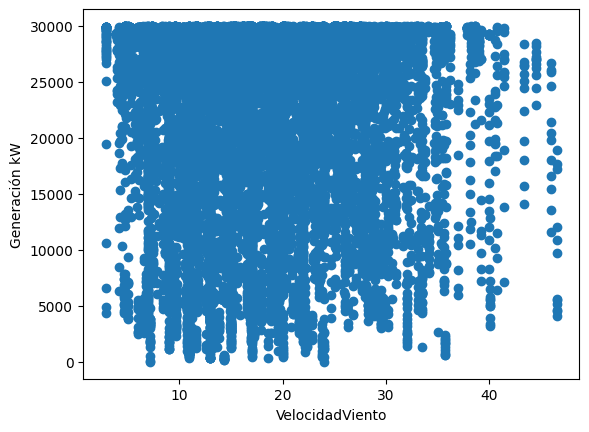

In [185]:
#Gráfica de dispersión Generación vs Velocidad del Viento
fig, ax = plt.subplots()
ax.scatter(x = generacion17ColFiltradas["VelocidadViento"].tolist(), y = generacion17ColFiltradas["Generación kW"].tolist())
plt.xlabel("VelocidadViento")
plt.ylabel("Generación kW")
plt.show()

### Dirección del Viento

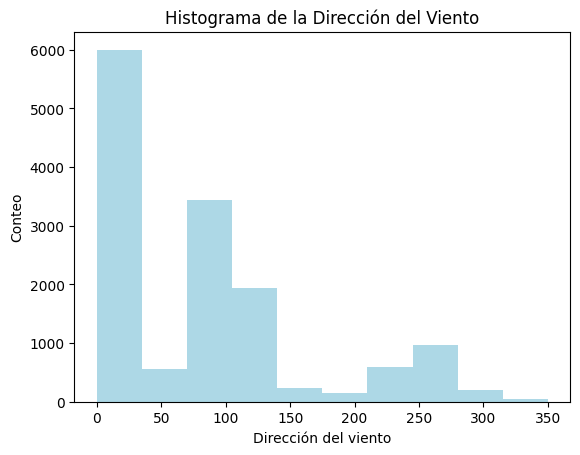

In [186]:
plt.figure(figsize=(6.4, 4.8))
plt.hist(generacion17ColFiltradas["DireccionViento"].values, color="lightblue")
plt.title("Histograma de la Dirección del Viento")
plt.xlabel("Dirección del viento")
plt.ylabel("Conteo")
plt.show()

In [187]:
columna = generacion17ColFiltradas["DireccionViento"].tolist()
Analisis_Descriptivo(columna)

Media: 76.51435177137294
Mediana: 77.0
Moda: [0.0]
Varianza Muestral: 7190.2865755556895
Varianza Poblacional: 7189.776191784
Desviación estándar Muestral: 84.79555752252408
Desviación estándar Poblacional: 84.79254797317981
Sesgo con respecto a la media muestral: 1.699658159915001e-26
Sesgo con respecto a la media poblacional: 1.6998391446871117e-26
Cuartiles: {1: 0.0, 2: 77.0, 3: 109.53, 4: 350.0}


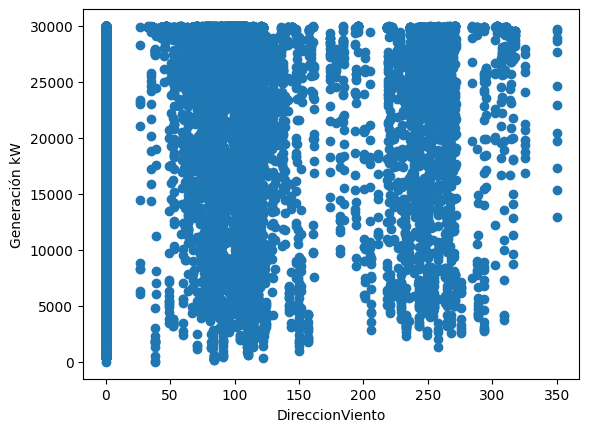

In [188]:
#Gráfica de dispersión Generación vs Dirección del Viento
fig, ax = plt.subplots()
ax.scatter(x = generacion17ColFiltradas["DireccionViento"].tolist(), y = generacion17ColFiltradas["Generación kW"].tolist())
plt.xlabel("DireccionViento")
plt.ylabel("Generación kW")
plt.show()

### Condición de Cielo

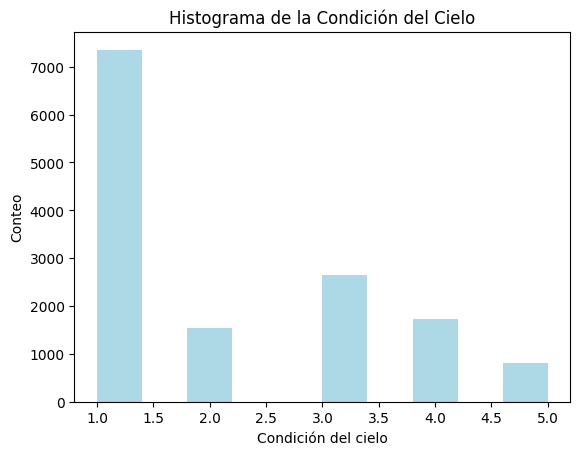

In [189]:
plt.figure(figsize=(6.4, 4.8))
plt.hist(generacion17ColFiltradas["CondicionCielo"].values, color="lightblue")
plt.title("Histograma de la Condición del Cielo")
plt.xlabel("Condición del cielo")
plt.ylabel("Conteo")
plt.show()